In [1]:
import pandas as pd
data = pd.read_csv('Dataset .csv')
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [2]:
data = data[['Restaurant Name', 'City', 'Locality', 'Latitude', 'Longitude', 'Aggregate rating']]
data

,Restaurant Name,City,Locality,Latitude,Longitude,Aggregate rating
0,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City",14.565443,121.027535,4.8
1,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City",14.553708,121.014101,4.5
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",14.581404,121.056831,4.4
3,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",14.585318,121.056475,4.9
4,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",14.584450,121.057508,4.8
...,...,...,...,...,...,...
9546,Naml۱ Gurme,��stanbul,Karak�_y,41.022793,28.977392,4.1
9547,Ceviz A��ac۱,��stanbul,Ko��uyolu,41.009847,29.041297,4.2
9548,Huqqa,��stanbul,Kuru�_e��me,41.055817,29.034640,3.7
9549,A���k Kahve,��stanbul,Kuru�_e��me,41.057979,29.036019,4.0


In [3]:
import pandas as pd
import folium
import random

In [4]:
# Group by city or locality and calculate average rating
avg_rating_by_location = data.groupby(['City', 'Locality']).agg({'Aggregate rating': 'mean', 'Latitude': 'mean', 'Longitude': 'mean', 'Restaurant Name': 'first'}).reset_index()

map = folium.Map(location=[avg_rating_by_location['Latitude'].mean(), avg_rating_by_location['Longitude'].mean()], zoom_start=12)

In [5]:
def generate_random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

In [6]:
city_colors = {city: generate_random_color() for city in avg_rating_by_location['City'].unique()}

In [7]:
for index, row in avg_rating_by_location.iterrows():
    city = row['City']
    color = city_colors[city]
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        tooltip="Click me!",
        popup=f"<b>Restaurant Name:</b> {row['Restaurant Name']}<br><b>Aggregate Rating:</b> {row['Aggregate rating']:.2f}",
        fill=True,
        fill_color=color,
        radius=6
    ).add_to(map)

In [8]:
map

In [9]:
data = pd.read_csv('Dataset .csv')

## Restaurant Density Heatmap:

In [10]:
import folium
from folium.plugins import HeatMap

map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)

heatmap_data = data[['Latitude', 'Longitude']].values.tolist()
HeatMap(heatmap_data).add_to(map)

map

## Price Range Distribution:

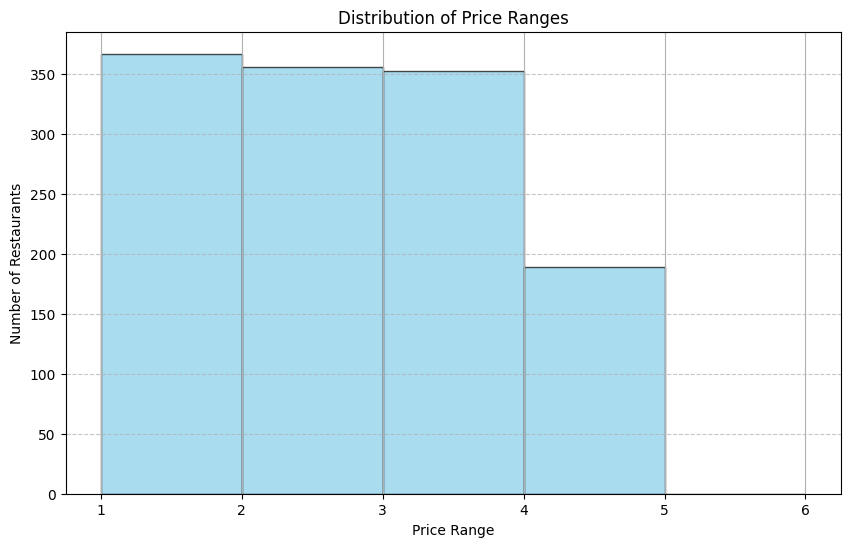

In [11]:
import matplotlib.pyplot as plt

avg_price_range_by_location = data.groupby(['City', 'Locality']).agg({'Price range': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
avg_price_range_by_location['Price range'].hist(bins=range(1, 7), color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Price Ranges')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Rating vs. Votes:

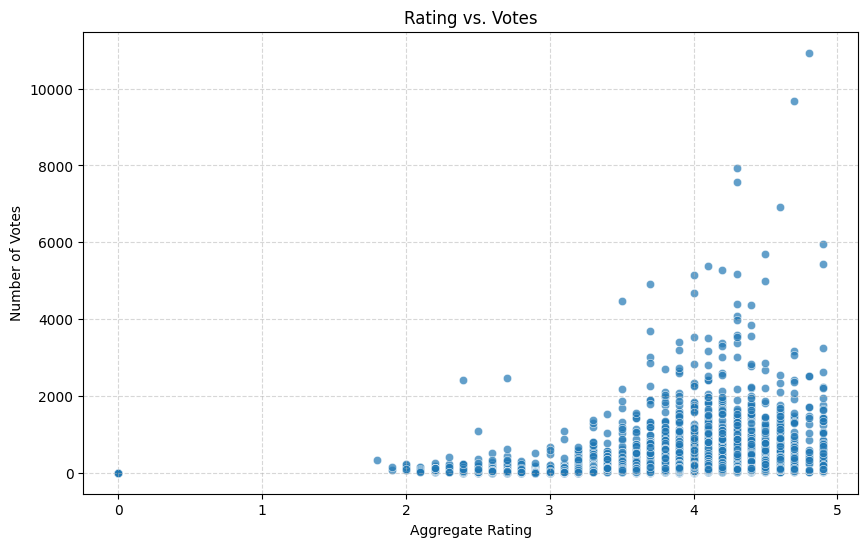

In [12]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Aggregate rating', y='Votes', alpha=0.7)
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Votes')
plt.title('Rating vs. Votes')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()

## Calculate Average Ratings by City or Locality:

In [13]:
avg_rating_by_location = data.groupby(['City']).agg({'Aggregate rating': 'mean'}).reset_index()
avg_rating_by_location

,City,Aggregate rating
0,Abu Dhabi,4.300000
1,Agra,3.965000
2,Ahmedabad,4.161905
3,Albany,3.555000
4,Allahabad,3.395000
...,...,...
136,Weirton,3.900000
137,Wellington City,4.250000
138,Winchester Bay,3.200000
139,Yorkton,3.300000


## Calculate Most Common Cuisines by City :

In [14]:
cuisine_df = data['Cuisines'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

data_with_cuisine = data.join(cuisine_df.rename('Cuisine'), how='inner')

most_common_cuisine_by_location = data_with_cuisine.groupby(['City', 'Cuisine']).size().reset_index(name='Count')
most_common_cuisine_by_location = most_common_cuisine_by_location.loc[most_common_cuisine_by_location.groupby(['City'])['Count'].idxmax()]
most_common_cuisine_by_location

,City,Cuisine,Count
11,Abu Dhabi,Indian,7
37,Agra,North Indian,15
48,Ahmedabad,Continental,12
62,Albany,American,4
91,Allahabad,North Indian,12
...,...,...,...
1815,Weirton,Burger,1
1820,Wellington City,Cafe,9
1835,Winchester Bay,Burger,1
1838,Yorkton,Asian,1


## Calculate Price Ranges by City or Locality:

In [15]:
avg_price_range_by_location = data.groupby(['City', 'Locality']).agg({'Price range': 'mean'}).reset_index()
avg_price_range_by_location

,City,Locality,Price range
0,Abu Dhabi,"Abu Dhabi Mall, Tourist Club Area (Al Zahiyah)",4.0
1,Abu Dhabi,Al Dhafrah,2.5
2,Abu Dhabi,Al Mushrif,3.0
3,Abu Dhabi,"Al Wahda Mall, Al Wahda",4.0
4,Abu Dhabi,"Crowne Plaza Abu Dhabi, Al Markaziya",4.0
...,...,...,...
1260,��stanbul,Kad۱k�_y Merkez,3.0
1261,��stanbul,Karak�_y,2.5
1262,��stanbul,Ko��uyolu,3.0
1263,��stanbul,Kuru�_e��me,4.0
